In [1]:
using QuBase
using QuDynamics

In [2]:
using PyPlot

INFO: Loading help data...


In [3]:
wc = 1.0 * 2 * pi   # cavity frequency
wa = 1.0 * 2 * pi   # atom frequency
g  = 0.25 * 2 * pi  # coupling strength
kappa = 0.05        # cavity dissipation rate
gamma = 0.15        # atom dissipation rate
use_rwa = true

true

In [4]:
# Hamiltonian
idc = QuArray(eye(10))
ida = QuArray(eye(2))
a  = tensor(ida, lowerop(10))
sm = tensor(lowerop(2), idc)
if use_rwa
    # use the rotating wave approxiation
    hamiltonian = wc * a' * a + wa * sm' * sm + g * (a' * sm + a * sm')
else
    hamiltonian = wc * a' * a + wa * sm' * sm + g * (a' + a) * (sm + sm')
end
init_state = complex(tensor(statevec(1, FiniteBasis(2)), statevec(6, FiniteBasis(10))))
init_state_dm = complex(init_state*init_state')
tlist = linspace(0., 10., 200)
c_ops = [sqrt(0.1) * a]

1-element Array{QuArray{FiniteBasis{Orthonormal},Float64,2,SparseMatrixCSC{Float64,Int64}},1}:
 20x20 QuMatrix in FiniteBasis{Orthonormal}:
...coefficients: SparseMatrixCSC{Float64,Int64}

	[1 ,  2]  =  0.316228
	[2 ,  3]  =  0.447214
	[3 ,  4]  =  0.547723
	[4 ,  5]  =  0.632456
	[5 ,  6]  =  0.707107
	[6 ,  7]  =  0.774597
	[7 ,  8]  =  0.83666
	[8 ,  9]  =  0.894427
	[9 , 10]  =  0.948683
	[11, 12]  =  0.316228
	[12, 13]  =  0.447214
	[13, 14]  =  0.547723
	[14, 15]  =  0.632456
	[15, 16]  =  0.707107
	[16, 17]  =  0.774597
	[17, 18]  =  0.83666
	[18, 19]  =  0.894427
	[19, 20]  =  0.948683

In [5]:
rho = Array(typeof(init_state_dm), length(tlist)-1)
qumcwfen = QuMCWFEnsemble(complex(init_state), 1000)
for i=1:length(tlist)-1
    rho[i] = complex(zeros(init_state_dm))
end

In [6]:
for psi0 in qumcwfen
    i = 1
    mcwf = QuMCWF()
    for (t,psi) in QuPropagator(hamiltonian, c_ops, psi0, tlist, mcwf)
        rho[i] = rho[i] + (psi*psi')/length(qumcwfen)/norm(psi)^2
        i = i + 1
    end
end

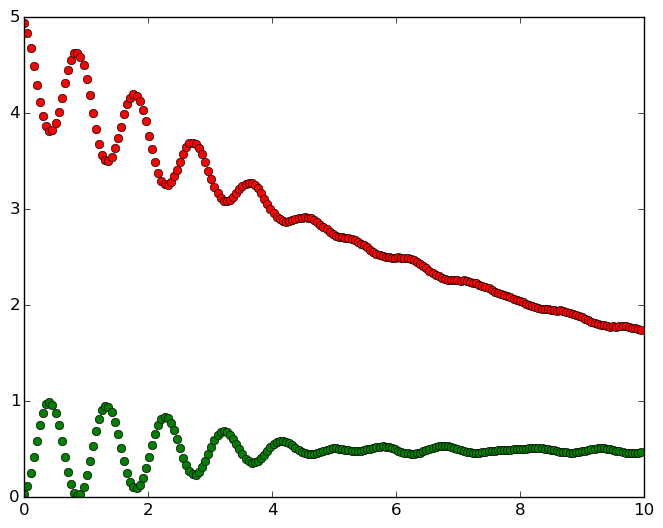

In [7]:
for i in 1:length(tlist)-1
    plot(tlist[i], real(trace(rho[i]*a'* a)), "ro")
    plot(tlist[i], real(trace(rho[i]*sm'* sm)), "go")
end